In [1]:
import collections
from matplotlib import pylab
from matplotlib.ticker import MaxNLocator

_Point= collections.namedtuple('Point',['x','h'])
    
class Skyline:
    
    ### Constructor
        #Qualsevol Skyline es defineix amb tres coordenades: (xmin,h,xmax)
    def __init__(self, sky=None):
        
        if sky == None:
            self.points=[]
            self.copia=[]
        elif isinstance(sky,tuple):
            self._create_from_tuple(sky)
        elif isinstance(sky,list):
            self._create_from_list(sky)
        elif isinstance(sky,str):
            self._create_from_file(sky)
        else:
            raise TypeError("El format introduït és incorrecte")
            
            
    
    ###Implementació del constructor 
    
        # el vector points conté punts del Skyline (tuples de dues posicions)
        # el vector copia conté les coordenades dels edificis originals (tuples de tres posicions)
            
        #La funció create_from_tuple permet crear un Skyline nou a partir de tres coordenades donades en format
        #d'un tuple. Defineix un Skyline amb un sol edifici. 
    def _create_from_tuple(self,sky):
        if len(sky)<3:
            raise TypeError("El format introduït és incorrecte, un Skyline es defineix amb 3 coordenades")
        self.points=[]
        self.copia=[]
        xmin= sky[0]
        h= sky[1]
        xmax= sky[2]
        self.copia.append((xmin,h,xmax))
        self.points.append((xmin, h))
        self.points.append((xmax,0))
        
        
        
        #La funció create_from_list permet crear un Skyline nou a partir de una llista que conte tuples de tres
        #coordenades. Defineix un Skyline a partir d'un conjunt de edificis.                  
    def _create_from_list(self,sky): 
        self.points=[]
        self.copia=[]
        for i in range (0, len(sky)):
            if len(sky[i])<3:
                raise TypeError("El format introduït és incorrecte, un Skyline es defineix amb 3 coordenades")
            xmin= sky[i][0]
            h= sky[i][1]
            xmax= sky[i][2]
            self.points.append((xmin,h,xmax))
            self.copia.append((xmin,h,xmax))
            #symplify() defineix els punts del Skyline a partir de unes dades donades
        self.points=self._simplify(self.points)
        
        
        
        # La funció create_from_file permet crear un nou Skyline a partir d'unes dades d'entrada donades en
        #un arxiu de text en format de tres coordenades per linea
    def _create_from_file (self,sky):
        f=open(sky,'r')
        self.points=[]
        self.copia=[]
        for line in f:
            llista=line.split()
            if len(llista)<3:
                raise TypeError("El format introduït és incorrecte, un Skyline es defineix amb 3 coordenades")
            xmin = int(llista[0])
            h  = int (llista[1])
            xmax =int (llista[2])
            self.points.append((xmin,h,xmax))
            self.copia.append((xmin,h,xmax))
            
        f.close()
        self.points=self._simplify(self.points)
        
        
        
    ###Creació de Skyline
        #Implementem el merge sort per determinar quins punts pertanyen al Skyline
    def _simplify(self,sky):
        if not sky:
            return ()
        if len(sky)==1:
            return [(sky[0][0],sky[0][1]),(sky[0][2],0)]# a partir de 3 coordenades retorna 2 punts que defineixen l'edifici
        middle = len(sky)//2
        left=self._simplify(sky[:middle])
        right=self._simplify(sky[middle:])
        return self._merge(left,right)
        
    def _merge (self, left, right):
        points=[]
        i = 0 #posició de left
        j = 0 #posició de right
        hl = 0 #altura left
        hr = 0 #altura right
        while i<len(left) and j<len(right):
            if left[i][0] < right[j][0]:
                x=left[i][0]
                hl=left[i][1]
                i=i+1
            elif left[i][0]>right[j][0]:
                x=right[j][0]
                hr=right[j][1]
                j=j+1
            else:
                x=left[i][0]
                hl=left[i][1]
                hr=right[j][1]
                i=i+1
                j=j+1
            if self._correct(points,max(hl,hr)):
                points.append((x,max(hl,hr)))
        #Afeigim els punts restants que no intersequen amb cap edifici
        points.extend(left[i:])
        points.extend(right[j:])
        return points
    
    #correct determina si el punt candidat no té la mateixa altura que un que ja hem afeigit al vector
    #per evitar punts que no estiguin a les cantonades
    def _correct(self,points,h):
        if len(points)==0:
            return True
        return h!=points[-1][1]
    

        
    ###Operadors
    
        #Operador +
    def __add__ (self, sky):
        return Skyline(self.copia+sky.copia)
    
    
        #Operador *
        #Retorna un Skyline nou corresponent a la interseccio de dos Skylines definits
    def __mul__(self,sky):
        new = Skyline ()
        points=[]
       
        i = 0  #posició primer vector
        j = 0  #posició segon vector
        hp = 0
        hs = 0
        while i<len(self.points) and j<len(sky.points):
            if self.points[i][0]<sky.points[j][0]:
                hp=self.points[i][1]
                x=self.points[i][0]
                i=i+1
                    
            elif self.points[i][0]>sky.points[j][0]:
                hs=sky.points[j][1]
                x=sky.points[j][0]
                j=j+1
            else:
                x=self.points[i][0]
                hs=sky.points[j][1]
                hp=self.points[i][1]
                i=i+1
                j=j+1
            if len(points)==0:
                if min(hs,hp)!=0: #assegurem que el primer punt no sigui d'altura 0
                    points.append((x,min(hs,hp)))
            elif min(hs,hp)!=0 or len(points)!=0:
                if min(hs,hp)!=points[-1][1]: #comprovem si la altura del punt candidat no coincideix amb l'últim afeigit a la intersecció
                    points.append((x,min(hs,hp)))
        new.points=points
        
        k = 0
        copia=[]
        while k<= len(new.points)-2:
            if new.points[k][1]!=0:
                xmin=new.points[k][0]
                h=new.points[k][1]
                xmax=new.points[k+1][0]
                copia.append((xmin,h,xmax))
            k=k+1
        new.copia=copia
        
        return new
    
    def __str__ (self):
        return str(self.points)
    def __repr__(self):
        return "Skyline("+ str(self) + ")"
    
    
    
    ### Funcions:
    
    def view (self):
        ''' La funció view() permet visualitzar un Skyline existent. No requereix cap paràmetre'''
        ax = pylab.figure().gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        i = 0
        while i<= len(self.copia)-1:
            bar = pylab.bar(x=self.copia[i][0], height=self.copia[i][1], width=self.copia[i][2]-self.copia[i][0], align='edge', color='palevioletred')
            i=i+1
        if len(self.copia)==0:
            bar = pylab.bar(x=0, height=0, width=0, align='edge', color='palevioletred')
            
            
    def save (self,sky):
        ''' La funció save() guarda un Skyline existent en un arxiu de text en forma de tres coordenades per cada edifici: (xmin, h, xmax) on xmin representa la primera coordenada de l'edifici, h representa la altura de l'edifici i la xmax representa la coordenada de final de l'edifici.
        Requereix un paràmetre d'entrada: el nom de l'arxiu en el qual es guardarà l'output en format 'nom_arxiu.txt' '''
        f=open(sky, 'w')
        i = 0
        while i<= len(self.points)-2:
            if self.points[i][1]!=0:
                f.write(str(self.points[i][0]))
                f.write(' ')
                f.write (str(self.points[i][1]))
                f.write(' ')
                f.write(str(self.points[i+1][0]))
                f.write('\n')
            i=i+1
        f.close()
        
    def area(self):
        '''  La funció area() permet calcular l'area d'un Skyline existent, el resultat es presenta en forma d'enter, no requereix cap paràmetre d'entrada '''
        if hasattr (self, '_area'): 
            return getattr(self,'_area')
        area=0
        i=0
        while i<= len(self.points)-2:
            if self.points[i][1]!=0:
                area=area+(self.points[i+1][0]-self.points[i][0])*self.points[i][1]
            i=i+1
        setattr(self,'_area',area)
        return area
                
    #Implementa la cerca binària per trobar el punt especificat
    def _find_h (self,x,left,right):
        mid = (left+right)//2
        if left>right:
            return 0
        if x > self.points[-1][0]:
            return 0
        if left == right:
            if self.points[mid][1]==0:
                return self.points[mid-1][1]
            return self.points[mid][1]
        
        if self.points[mid][0]==x:
            if self.points[mid][1]==0:
                return self.points[mid-1][1]
            
            return self.points[mid][1]
        
        if self.points[mid][0]>x:
            return _self.find_h (x,left, mid-1)

            
        if self.points[mid][0]<x:
            return self._find_h (x,mid+1, right)
        
    
    #Implementa la cerca lineal per buscar la altura màxima        
    def _max_h(self):
        m=0
        i=0
        while i<len(self.points):
            if self.points[i][1]>m:
                m=self.points[i][1]
            i+=1
        return m
        
    def height(self,x=None):
        '''La funció height() retorna un enter que representa la altura en un punt concret x si li passem un parametre x de la forma height(x)
        Sense cap paràmetre d'entrada la funcio retorna un enter que representa la altura màxima en un Skyline definit '''
        if x == None:
            if hasattr (self, '_max_height'): 
                return getattr(self,'_max_height')  
            
            max_h = self._max_h()
            setattr(self,'_max_height',max_h)
            return max_h
        
        if hasattr (self, '_height'): 
            return getattr(self,'_height')  
        left = 0
        right = len(self.points)-1
        h=self._find_h(x,left,right)
        setattr(self,'_height',h)
        return h
        
    def bbox (self):
        ''' La funció bbox() retorna un Skyline nou que conte un Skyline definit.
        La sortida és una caixa contenidora del Skyline original, el bbox() te les seguents mides:
        xmin=primera x del Skyline original, h=altura màxima del Skyline original, xmax=ultima coordenada del Skyline original'''
        xmin=self.points[0][0]
        xmax=self.points[-1][0]
        h=self.max_h()
        new=Skyline((xmin,h,xmax))
        return new
        
    def cut_top(self,h):
        '''La funció cut_top() modifica el Skyline original tallant-lo per dalt per la altura especificada en la entrada de la següent forma:
        cut_top(h), on h representa la altura màxima del Skyline nou'''
        if hasattr (self, '_height'):
            delattr(self, '_height')
        if hasattr (self, '_max_height'):
            delattr(self, '_max_height')
        if hasattr (self, '_area'):
            delattr(self, '_area')
        
        self.new=[] #nou vector que substituira el existent copia[...]
        i=0
        while i<len(self.copia):
            if self.copia[i][1]<=h:
                self.new.append((self.copia[i][0],self.copia[i][1],self.copia[i][2]))
            else:
                self.new.append((self.copia[i][0],h,self.copia[i][2]))
            i=i+1
        cutsky = Skyline(self.new) #definim nou Skyline amb les noves dimensions
        self.points = cutsky.points
        self.copia=cutsky.copia
        return self #modifica el Skyline d'entrada
    
    def find_slot(self, w=None):
        ''' La funció find_slot() busca un espai entre els edificis de una mida especificada o busca l'espai més gran.
        La funció requereix un paràmetre d'entrada, l'amplada de l'espai buscat en el següent format: find_slot(w), en aquest cas la funció retornarà la primera coordenada x on comença el forat demanat.
        Si no se li passa cap paràmetre d'entrada, la funció buscarà l'espai buit més gran i retornara un parell d'enters (x,w), on x=primera coordenada del forat i w=amplada del forat'''
        if w==None:
            m = self.points[0][0]
            x = 0
            slot=0
            for i in range (0,len(self.points)-1):
                if self.points[i][1]==0:
                    slot=self.points[i+1][0]-self.points[i][0]
                if slot>m:
                    m=slot
                    x=self.points[i][0]
            return (x,m)
        else:
            if self.points[0][0]>=w: #mira si el slot es troba abans del començament del Skyline
                return 0
            for i in range (0,len(self.points)-1):
                if self.points[i][1]==0:
                    if self.points[i+1][0]-self.points[i][0] >= w:
                        return self.points[i][0]
            return self.points[-1][0] #si no troba el slot dintre de l'interval de Skyline retorna la ultima coordenada
        
    def span(self):
        '''La funció span() no requereix cap  paràmetre d'entrada i retorna un parell d'enters (x1,x2), on x1=primera coordenada x d'un Skyline definit i x2=última coordenada x del Skyline.
        En el cas que el Skyline definit sigui buit la funció retorna (0,0)'''
        if len(self.points)>0:
            return (self.points[0][0], self.points[-1][0])
        return (0,0)
        
        
    def select(self,xmin,xmax):
        ''' La funció select() modifica el Skyline original i selecciona (retalla) aquella part del Skyline que l'interval introduït especifica.
        La funció requereix dos paràmetres d'entrada en el següent format: select(xmin,xmax), on xmin=la primera coordenada x del nou Skyline i xmax=última coordenada x del nou Skyline.
        La funció no modifica la altura del Skyline en l'interval demanat. '''
        if hasattr (self, '_height'):
            delattr(self, '_height')
        if hasattr (self, '_max_height'):
            delattr(self, '_max_height')
        if hasattr (self, '_area'):
            delattr(self, '_area')
            
        h=self.height()
        a=Skyline((xmin,h,xmax)) #definim un Skyline (caixa) de mides de l'interval xmin,xmax i altura màxima del Skyline original
        new=self*a #fem la intersecció del Skyline amb la caixa definida ^^
        self.points = new.points
        self.copia = new.copia
        return self #modifica el Skyline d'entrada 
        
            

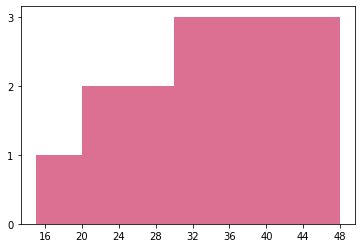

In [2]:
p=Skyline([(30,3,48),(20,2,36),(15,1,25)])

p.view()